In [1]:
import numpy as np
import h5py
import pandas as pd
import uproot
import vector
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
fname = "/data/jchishol/mc16e/mntuple_ttbar_0_parton_ejets.root"
rootfile = uproot.open(fname)
truth_tree = rootfile['parton'].arrays()
reco_tree = rootfile['reco'].arrays()

In [3]:
isNotDummy = truth_tree['isDummy']==0
isMatched = reco_tree['isMatched']==1
metCut = reco_tree['met_met']/1000 >= 20
isNotNan_thad = np.invert(np.isnan(truth_tree['MC_thad_afterFSR_y']))
isNotNan_tlep = np.invert(np.isnan(truth_tree['MC_tlep_afterFSR_y']))
isNotNan_W1_t = np.invert(np.isnan(truth_tree['MC_Wdecay1_from_t_afterFSR_y']))
isNotNan_W2_t = np.invert(np.isnan(truth_tree['MC_Wdecay2_from_t_afterFSR_y']))
isNotNan_W1_tbar = np.invert(np.isnan(truth_tree['MC_Wdecay1_from_tbar_afterFSR_y']))
isNotNan_W2_tbar = np.invert(np.isnan(truth_tree['MC_Wdecay2_from_tbar_afterFSR_y']))

pass_selection = isNotDummy * isMatched * metCut * isNotNan_thad * isNotNan_tlep * isNotNan_W1_t * isNotNan_W2_t * isNotNan_W1_tbar * isNotNan_W2_tbar
truth_tree_good = truth_tree[pass_selection]

print(len(truth_tree['isDummy']))
print(len(truth_tree_good['isDummy']))

885491
694211


In [42]:
df_truth = ak.to_pandas(truth_tree_good['isDummy'])
df_truth.rename(columns={'values':'isDummy'},inplace=True)


df_truth['Wdecay1_from_t_y'] = truth_tree_good['MC_Wdecay1_from_t_afterFSR_y']
df_truth['Wdecay1_from_t_m'] = truth_tree_good['MC_Wdecay1_from_t_afterFSR_m']
df_truth['Wdecay1_from_t_pt'] = truth_tree_good['MC_Wdecay1_from_t_afterFSR_pt']
df_truth['Wdecay1_from_t_eta'] = truth_tree_good['MC_Wdecay1_from_t_afterFSR_eta']


df_truth['diff'] = (df_truth['Wdecay1_from_t_eta'] - df_truth['Wdecay1_from_t_y'])/df_truth['Wdecay1_from_t_eta']

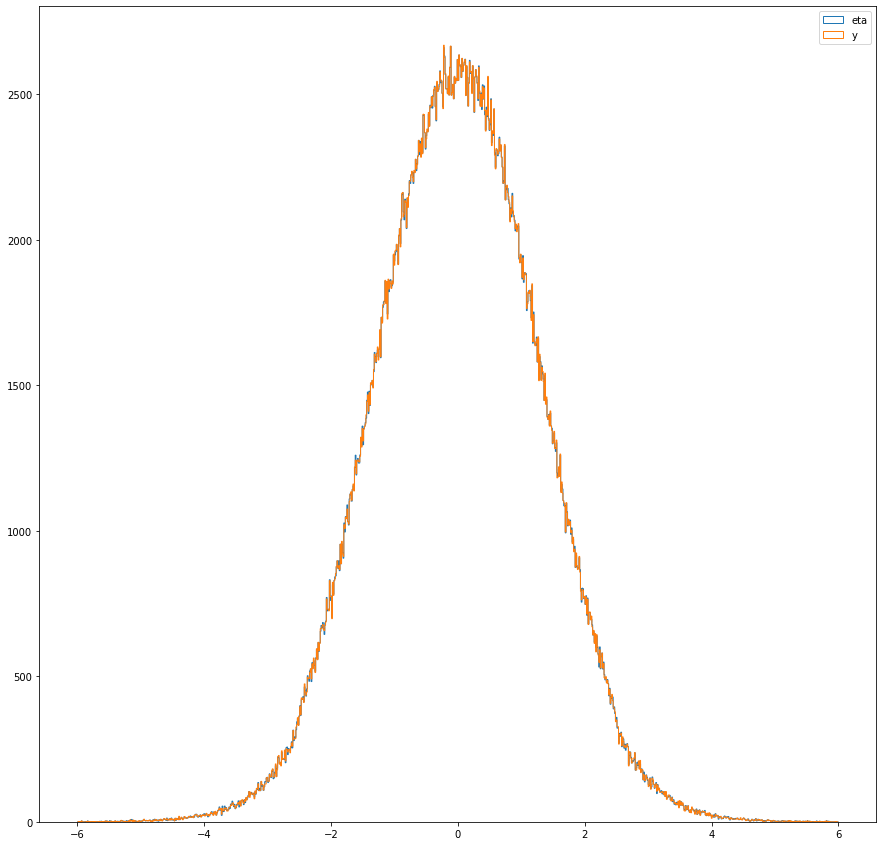

In [41]:
plt.figure('comp',figsize=[15,15])
plt.hist(df_truth['Wdecay1_from_t_eta'],bins=1000,range=(-6,6),histtype='step')
plt.hist(df_truth['Wdecay1_from_t_y'],bins=1000,range=(-6,6),histtype='step')
plt.legend(['eta','y'])

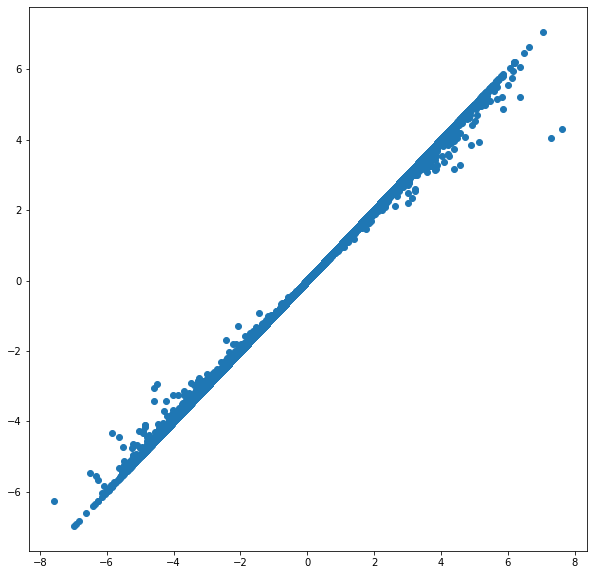

In [34]:
plt.figure('comp',figsize=[10,10])
plt.plot(df_truth['Wdecay1_from_t_eta'],df_truth['Wdecay1_from_t_y'],'o')

(array([1.00000e+00, 3.00000e+00, 5.69433e+05, 7.38970e+04, 2.19340e+04,
        9.54400e+03, 5.04900e+03, 3.06900e+03, 2.12300e+03, 1.43100e+03,
        1.08400e+03, 8.68000e+02, 6.20000e+02, 5.08000e+02, 4.66000e+02,
        3.81000e+02, 3.05000e+02, 3.03000e+02, 2.28000e+02, 2.21000e+02,
        1.90000e+02, 1.61000e+02, 1.57000e+02, 1.35000e+02, 1.32000e+02,
        9.70000e+01, 1.05000e+02, 1.05000e+02, 7.50000e+01, 6.00000e+01,
        7.60000e+01, 6.00000e+01, 6.10000e+01, 4.80000e+01, 4.90000e+01,
        5.30000e+01, 3.80000e+01, 3.50000e+01, 4.30000e+01, 4.20000e+01,
        3.50000e+01, 3.50000e+01, 2.50000e+01, 2.10000e+01, 2.30000e+01,
        2.60000e+01, 2.10000e+01, 1.80000e+01, 2.70000e+01, 2.30000e+01,
        2.20000e+01, 1.60000e+01, 1.00000e+01, 1.50000e+01, 2.40000e+01,
        1.90000e+01, 1.60000e+01, 1.00000e+01, 1.30000e+01, 1.20000e+01,
        1.20000e+01, 8.00000e+00, 1.10000e+01, 8.00000e+00, 1.90000e+01,
        1.20000e+01, 1.60000e+01, 1.40000e+01, 5.00

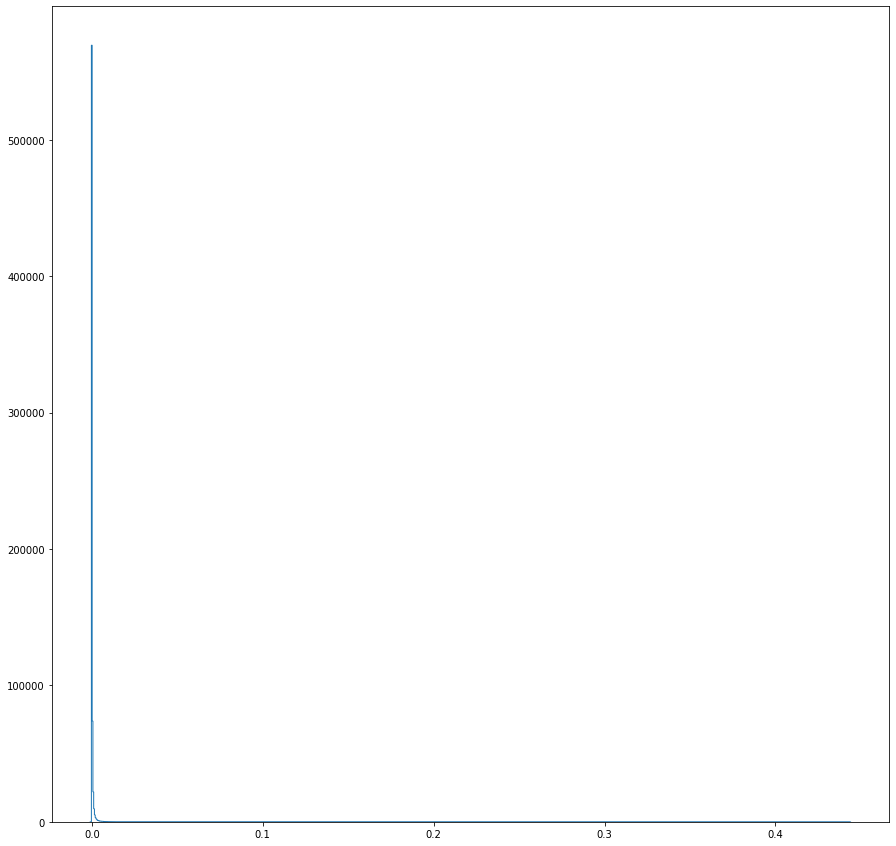

In [45]:
plt.figure('diff',figsize=[15,15])
plt.hist(df_truth['diff'],bins=1000,histtype='step')

In [48]:
df_truth_W = ak.to_pandas(truth_tree_good['isDummy'])
df_truth_W.rename(columns={'values':'isDummy'},inplace=True)


W_pt = []
W_phi = []
W_eta = []
W_m = []

# Run through each event
num_events = len(df_truth_W['isDummy'])
for i in range(num_events):

    # Get W decay vectors
    Wdecay1_vec = vector.obj(pt=truth_tree_good['MC_Wdecay1_from_t_afterFSR_pt'][i],phi=truth_tree_good['MC_Wdecay1_from_t_afterFSR_phi'][i],rapidity=truth_tree_good['MC_Wdecay1_from_t_afterFSR_y'][i],mass=truth_tree_good['MC_Wdecay1_from_t_afterFSR_m'][i])
    Wdecay2_vec = vector.obj(pt=truth_tree_good['MC_Wdecay2_from_t_afterFSR_pt'][i],phi=truth_tree_good['MC_Wdecay2_from_t_afterFSR_phi'][i],rapidity=truth_tree_good['MC_Wdecay2_from_t_afterFSR_y'][i],mass=truth_tree_good['MC_Wdecay2_from_t_afterFSR_m'][i])

    # Add to get W vector
    W_vec = Wdecay1_vec + Wdecay2_vec

    # Append vector values to list
    W_pt.append(W_vec.pt)
    W_phi.append(W_vec.phi)
    W_eta.append(W_vec.eta)
    W_m.append(W_vec.mass)


# Put values in dataframe
df_truth_W['w_from_t_pt'] = W_pt
df_truth_W['w_from_t_phi'] = W_phi
df_truth_W['w_from_t_eta'] = W_eta
df_truth_W['w_from_t_m'] = W_m

TypeError: unrecognized combination of coordinates, allowed combinations are:

    (2D) x= y=
    (2D) rho= phi=
    (3D) x= y= z=
    (3D) x= y= theta=
    (3D) x= y= eta=
    (3D) rho= phi= z=
    (3D) rho= phi= theta=
    (3D) rho= phi= eta=
    (4D) x= y= z= t=
    (4D) x= y= z= tau=
    (4D) x= y= theta= t=
    (4D) x= y= theta= tau=
    (4D) x= y= eta= t=
    (4D) x= y= eta= tau=
    (4D) rho= phi= z= t=
    (4D) rho= phi= z= tau=
    (4D) rho= phi= theta= t=
    (4D) rho= phi= theta= tau=
    (4D) rho= phi= eta= t=
    (4D) rho= phi= eta= tau=

In [7]:
df_truth_W['Wdecay1_from_t'] = truth_tree_good['MC_Wdecay1_from_t_afterFSR_eta']
df_truth_W['Wdecay2_from_t'] = truth_tree_good['MC_Wdecay2_from_t_afterFSR_eta']

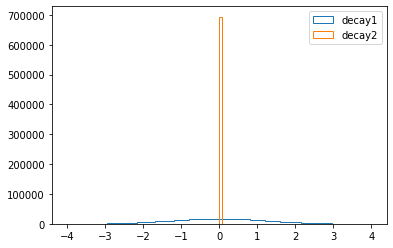

In [20]:
plt.hist(df_truth_W['Wdecay1_from_t'],bins=100,range=(-4,4),histtype='step')
plt.hist(df_truth_W['Wdecay2_from_t'],bins=100,range=(-4,4),histtype='step')
plt.legend(['decay1','decay2'])

(array([  225.,   245.,   309.,   308.,   429.,   450.,   560.,   593.,
          735.,   839.,  1005.,  1143.,  1403.,  1615.,  1843.,  2070.,
         2509.,  2785.,  3257.,  3671.,  4286.,  4681.,  5276.,  5666.,
         6426.,  6860.,  7484.,  7777.,  8510.,  9152.,  9577., 10096.,
        10574., 11201., 11584., 11939., 12263., 12997., 13118., 13422.,
        13585., 13672., 13767., 13688., 13961., 13924., 13818., 13741.,
        14076., 13985., 13889., 13802., 13867., 13800., 13969., 13819.,
        13888., 13553., 13646., 13387., 13157., 13059., 12663., 12273.,
        11972., 11424., 10968., 10501., 10025.,  9672.,  8916.,  8533.,
         7942.,  7282.,  6948.,  6263.,  5665.,  5240.,  4691.,  4136.,
         3710.,  3258.,  2817.,  2516.,  2129.,  1805.,  1602.,  1326.,
         1133.,  1011.,   870.,   658.,   601.,   537.,   454.,   358.,
          352.,   272.,   230.,   181.]),
 array([-4.  , -3.92, -3.84, -3.76, -3.68, -3.6 , -3.52, -3.44, -3.36,
        -3.28, -3.2 , -

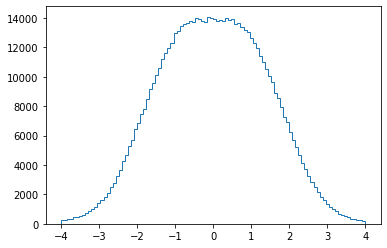

In [47]:
plt.hist(df_truth_W['w_from_t_eta'],bins=100,range=(-4,4),histtype='step')
